# Importing Libraries 

  * Introduction of Pythons libraries which is used in the given dataset
* Pandas : used as basic Level where it is manipulate and analyse the given dataset
* Numpy : used as basically numerical data for mathematical calculation
* Matplotlib : it is used for visualising the data
* Seaborn : it is advanced visulating libraries 
* Scikit : Basically it used for modelling and evaluation the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso 
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Importing a dataset

In [2]:
df = pd.read_csv('diamonds.csv')

# Get the attribute Information

In [3]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [4]:
df.tail(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# Shape of data 

In [5]:
print('The total size of a diamond dataset :',df.shape)

The total size of a diamond dataset : (53940, 11)


In [6]:
(df.columns.tolist())

['Unnamed: 0',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

# List of Columns


- Unnamed: 0 -> it is useless 
- Carat -> Carat is the unit of measurement for the physical weight of diamonds.
- Cut -> cut refers to how well-proportioned the dimensions of a diamond to create sparkle and brilliance
- Color -> color is a crucial aspect of your diamond's appearance
- Clarity ->  a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- Depth ->  the distance in millimeters from its culet (bottom tip) to its table (flat top surface).
- Table -> table is the facet which can be seen when the stone is viewed face up
- Price -> price of a diamond
- x -> coordinates of x -axis
- y -> coordinates of y-axis
- z -> coordinates of z-axis

In [7]:
# drop useless columns 
df.drop(df[['Unnamed: 0', 'x', 'y', 'z']], axis=1, inplace=True)

In [8]:
print('After removing useless columns :')

df.head(4)

After removing useless columns :


,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334


In [9]:
df.info() # information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [10]:
print("Datatype of all columns:")
df.dtypes 

Datatype of all columns:


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
dtype: object

# Check it is null or not & any duplicated 


In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [12]:
df.duplicated().sum()

803

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
print('After remove duplicated value:',df.duplicated().sum())

After remove duplicated value: 0


# Summary of Diamond Dataset

In [15]:
df.describe()

,carat,depth,table,price
count,53137.000000,53137.000000,53137.000000,53137.000000
mean,0.802930,61.745185,57.471263,3967.827258
std,0.473626,1.436319,2.237208,3998.021972
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,967.000000
50%,0.710000,61.800000,57.000000,2451.000000
75%,1.050000,62.500000,59.000000,5376.000000
max,5.010000,79.000000,95.000000,18823.000000


In [16]:
df.sample(10) # print random 10 samples of a dataset

,carat,cut,color,clarity,depth,table,price
41177,0.40,Premium,G,VVS1,62.3,58.0,1200
8478,1.01,Good,F,SI2,63.9,54.0,4416
37446,0.50,Very Good,H,SI1,63.1,55.0,984
48094,0.51,Ideal,G,VVS1,61.0,57.0,1933
38505,0.50,Fair,F,SI2,65.5,54.0,1031
37247,0.43,Good,D,VS2,59.9,61.0,976
17710,0.41,Ideal,J,VS2,62.4,55.0,613
24601,2.02,Very Good,J,SI1,63.5,60.0,12915
46862,0.53,Ideal,G,VS1,61.8,55.0,1813
9516,1.22,Ideal,I,SI2,61.8,57.0,4612


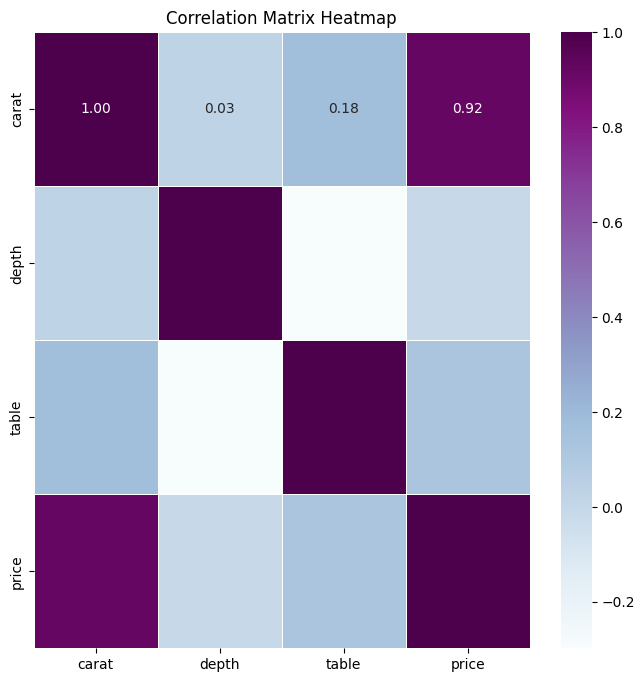

In [17]:


numeric_columns = df[['carat', 'depth','table','price']]
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f",
           linewidths = 0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

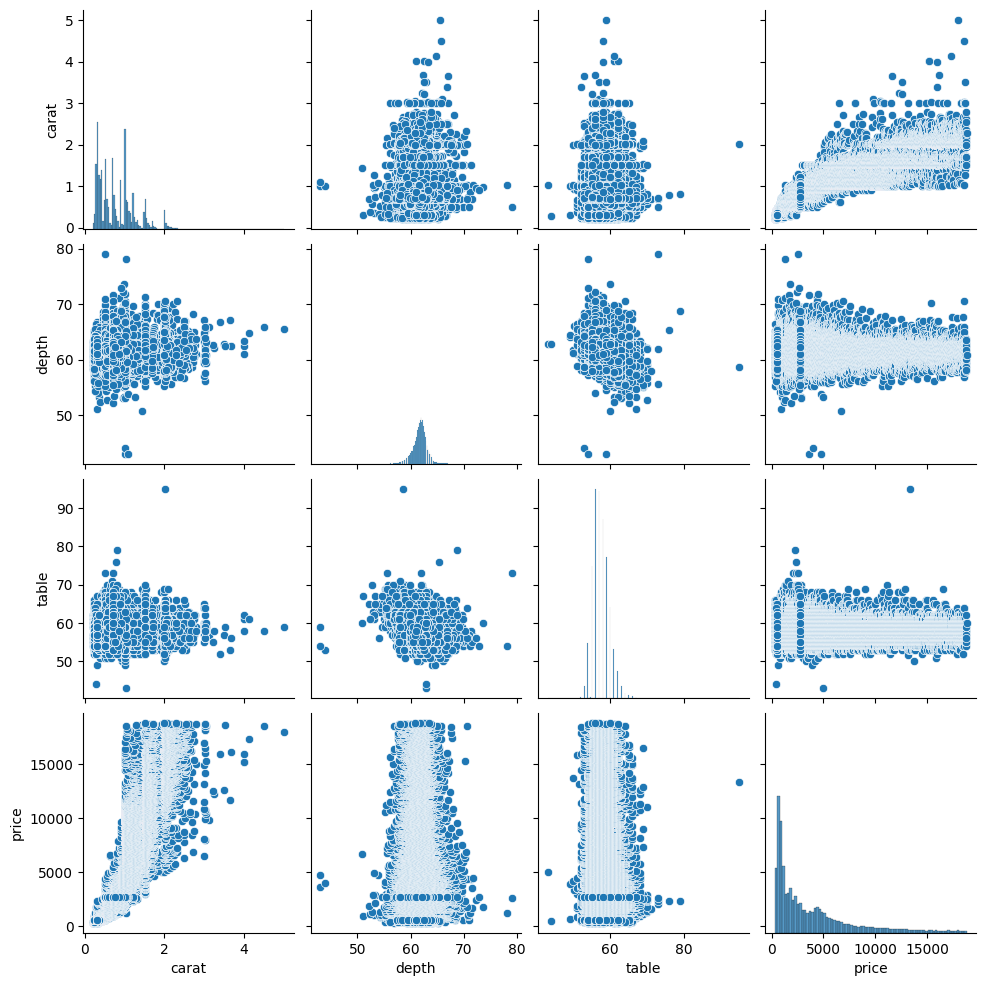

In [18]:
sns.pairplot(data = df)

<Axes: xlabel='cut', ylabel='count'>

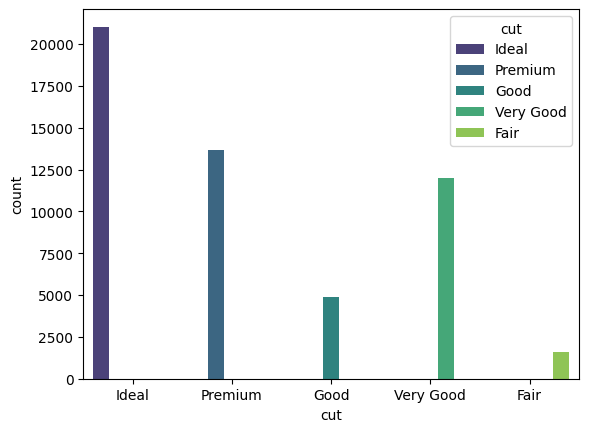

In [19]:
df['cut'].value_counts()

sns.countplot(x=df.cut, hue=df.cut, palette='viridis')

<Axes: xlabel='color', ylabel='count'>

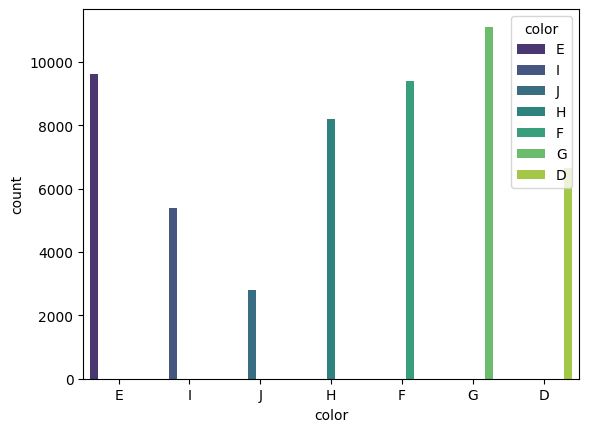

In [20]:
df['color'].value_counts()

sns.countplot(x=df.color, hue=df.color, palette='viridis')

<Axes: xlabel='clarity', ylabel='count'>

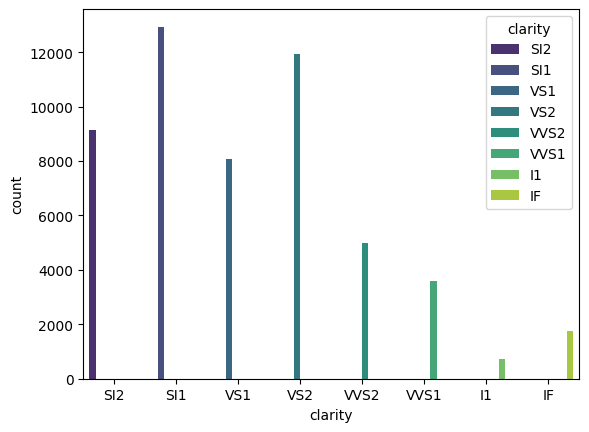

In [21]:
df['clarity'].value_counts()


sns.countplot(x=df.clarity, hue=df.clarity, palette='viridis')

<Axes: xlabel='price'>

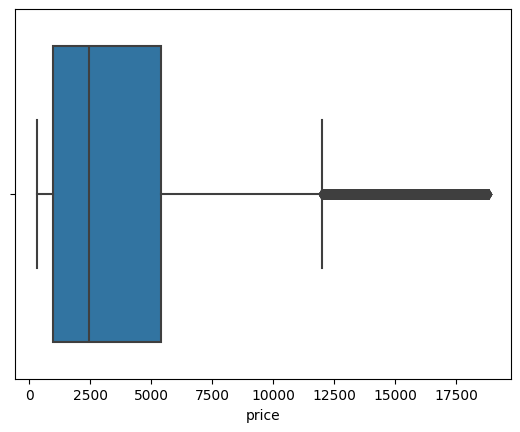

In [22]:
sns.boxplot(x=df['price'])

In [23]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
dtype: int64

Text(0.5, 1.0, 'Cut Count')

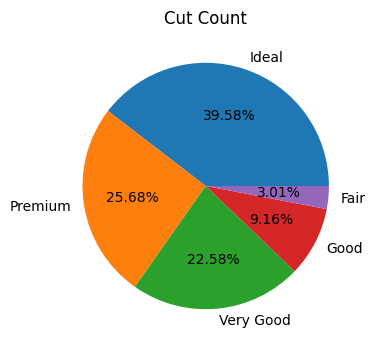

In [24]:
plt.figure(figsize=(5,4))
plt.pie(df.cut.value_counts().values, labels = df.cut.value_counts().index,
       autopct='%1.2f%%')
plt.title("Cut Count")


Text(0.5, 1.0, 'Relationship between carat and price with respect to cut quality of their diamond')

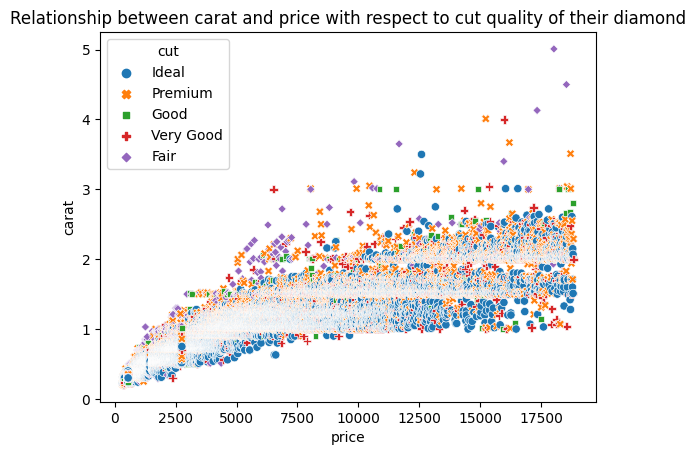

In [25]:
sns.scatterplot(df, y=df.carat, x=df.price , hue=df.cut, style=df.cut)
plt.title("Relationship between carat and price with respect to cut quality of their diamond")

C:\Users\loves\AppData\Local\Temp\ipykernel_21440\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: xlabel='price', ylabel='Density'>

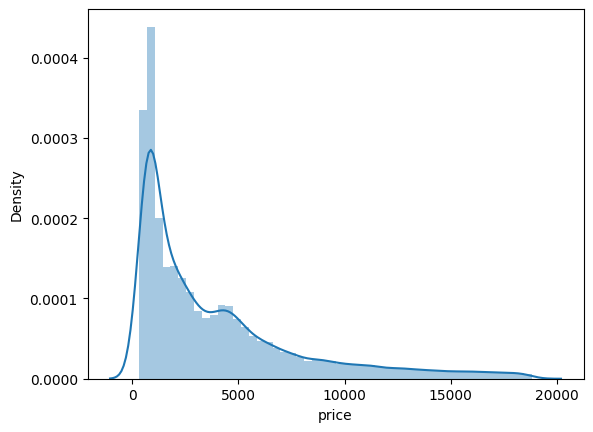

In [26]:
sns.distplot(df.price)

# model testing

In [27]:
x = df.drop(columns= ['price'])
y = df.price

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2392)

In [29]:
x_train.shape, y_train.shape

((37195, 6), (37195,))

In [30]:
x_test.shape, y_test.shape

((15942, 6), (15942,))

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Linear Regression 

In [53]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False,drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [54]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('step2', LinearRegression())])

In [55]:
y_pred = pipe.predict(x_test)

In [56]:
print('R2 Value:',r2_score(y_pred,y_test))


R2 Value: 0.9070815016468063


# Ridge 


In [57]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False, drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [58]:

pipe.fit(x_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('step2', Ridge(alpha=10))])

In [59]:
y_pred=pipe.predict(x_test)

print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.9159854875272063


# Lasso

In [60]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [62]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('step2', Lasso(alpha=0.001))])

In [63]:
y_pred=pipe.predict(x_test)

print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.9161771606883611


# KNN 

In [42]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors = 4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [43]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first'),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('step2', KNeighborsRegressor(n_neighbors=4))])

In [44]:
y_pred=pipe.predict(x_test)

print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.7702531600271065


# Decision Trees

In [45]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(sparse_output = False,drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [46]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('step2', DecisionTreeRegressor(max_depth=8))])

In [47]:
y_pred = pipe.predict(x_test)
print('R2 Score:',r2_score(y_test, y_test))

R2 Score: 1.0


# Random Forest Regressor

In [48]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.9736099636587119


# Support Vector Machine(SVM)

In [49]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.8529194034617444


# Xg Boost


In [50]:
step1 = ColumnTransformer(transformers= [
    ('col_tnf',OneHotEncoder(drop='first'),['cut','color','clarity'])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.975004971630552


In [64]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor()
reg.fit(x_train, x_test, y_train, y_test)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [2]:
import pickle

In [ ]:
pickle.dump(reg,open('taxi.pkl','wb'))

# Test the model
model = pickle.